# Analysis Development

Develop the plotting functions and metrics for analyzing trial data from MATLAB sim_MAIN.m script.

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('mitch-exp')

In [3]:
import annalysis as ann

In [4]:
ls

002852_0414.csv          cross_track_errors.csv   fig/
Icon?                    data/                    keras-matlab-test.ipynb
analysis-dev.ipynb       data 4-30/               keras-tutorial.ipynb
analysis.ipynb           data 4-30_2/             net-analysis.ipynb
annalysis.py             data 4-30_3/             trials/
annalysis.pyc            data 4-30_4/


In [23]:
cd ..

/Users/mitchallain/Google Drive/CSCE 635 Project/Code/jupyter


In [24]:
cd data\ 4-30_3

/Users/mitchallain/Google Drive/CSCE 635 Project/Code/jupyter/data 4-30_3


In [4]:
stamp = '04-26-17_22-18-13'
trial = pd.read_csv('xuesu0_out_' + stamp + '.csv')
trial_meta = pd.read_csv('xuesu0_meta_' + stamp + '.csv')

In [5]:
trial.head()

,t,u,wt1,wt2,wt3,wt4,wt5,wt6,wt7,wt8,wt9,r,y,em_x,em_y,Unnamed: 15
0,0.0,-0.785400,1,1,1,-1,-1,-1,0.01,0.001,1,-1.2490,4.1888,0.000000,0.000000,NaN
1,0.2,0.785400,1,1,1,-1,-1,-1,0.01,0.001,1,-1.2475,-2.0945,-0.001999,-0.003463,NaN
2,0.4,0.008838,1,1,1,-1,-1,-1,0.01,0.001,1,-1.2431,-2.0940,-0.007990,-0.013840,NaN
3,0.6,0.011734,1,1,1,-1,-1,-1,0.01,0.001,1,-1.2356,-2.0926,-0.017932,-0.031104,NaN
4,0.8,0.015645,1,1,1,-1,-1,-1,0.01,0.001,1,-1.2252,-2.0913,-0.031769,-0.055207,NaN


In [6]:
trial_meta.head()

,em2vic_x,em2vic_y,theta_i,current_x,current_y,throttle,Unnamed: 6
0,11,-33,4.1888,0.0,0.0,8.0,NaN
1,mem,step,NaN,NaN,NaN,NaN,NaN
2,500,0,NaN,NaN,NaN,NaN,NaN
3,train_bool,path_type,LOS_radius,NaN,NaN,NaN,NaN
4,1,straight,100,NaN,NaN,NaN,NaN


In [7]:
pevix = float(trial_meta['em2vic_x'][0])
peviy = float(trial_meta['em2vic_y'][0])

target = (pevix, peviy)

In [8]:
plt.plot(trial['em_x'], trial['em_y'])
plt.axis('equal')

<IPython.core.display.Javascript object>

(-1.8060750000000003, 11.019375, -29.60811, 1.40991)

In [9]:
def view_trial(trial, trial_meta, title='Test'):
    start = (trial['em_x'][0], trial['em_y'][0])
    end = (float(trial_meta['em2vic_x'][0]), float(trial_meta['em2vic_y'][0]))
    
    plt.plot(trial['em_x'], trial['em_y'], label='EMILY Path')
    plt.scatter(*start, marker='x', label='Initial Pos')
    plt.scatter(*end, marker='o', label='Victim')
    plt.axis('equal')
    
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.legend(loc='best')
    plt.title(title)

In [10]:
plt.figure(figsize=(6, 8))
view_trial(trial, trial_meta, 'Test')

<IPython.core.display.Javascript object>

In [54]:
def load_data_from_stamp(stamp):
    trial = pd.read_csv('xuesu0_out_' + stamp + '.csv')
    trial_meta = pd.read_csv('xuesu0_meta_' + stamp + '.csv')
    return trial, trial_meta

In [7]:
import os

In [25]:
files = os.listdir('.')
stamps = [f for f in files if '_out' in f]
stamps

['GPID_trial_01_out_04-30-17_19-46-40.csv',
 'GPID_trial_02_out_04-30-17_19-47-28.csv',
 'GPID_trial_03_out_04-30-17_19-48-07.csv',
 'GPID_trial_04_out_04-30-17_19-48-46.csv',
 'GPID_trial_05_out_04-30-17_19-49-21.csv',
 'GPID_trial_06_out_04-30-17_19-50-37.csv',
 'GPID_trial_07_out_04-30-17_19-51-24.csv',
 'GPID_trial_08_out_04-30-17_19-51-59.csv',
 'GPID_trial_09_out_04-30-17_19-52-36.csv',
 'GPID_trial_100_out_04-30-17_20-44-21.csv',
 'GPID_trial_101_out_04-30-17_20-44-26.csv',
 'GPID_trial_102_out_04-30-17_20-44-26.csv',
 'GPID_trial_103_out_04-30-17_20-44-35.csv',
 'GPID_trial_104_out_04-30-17_20-44-37.csv',
 'GPID_trial_105_out_04-30-17_20-44-49.csv',
 'GPID_trial_106_out_04-30-17_20-44-50.csv',
 'GPID_trial_107_out_04-30-17_20-45-02.csv',
 'GPID_trial_108_out_04-30-17_20-45-11.csv',
 'GPID_trial_109_out_04-30-17_20-45-12.csv',
 'GPID_trial_10_out_04-30-17_19-52-56.csv',
 'GPID_trial_110_out_04-30-17_20-45-16.csv',
 'GPID_trial_111_out_04-30-17_20-45-21.csv',
 'GPID_trial_112_out

In [28]:
def plot_all():
    files = os.listdir('.')
    stamps = [f for f in files[:20] if 'out' in f]
    for stamp in stamps:
        plt.figure(figsize=(4, 3))
        ann.view_trial(*ann.load_data_from_fname(stamp), title=stamp)

<IPython.core.display.Javascript object>


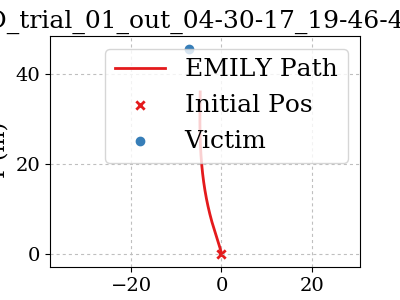

<IPython.core.display.Javascript object>


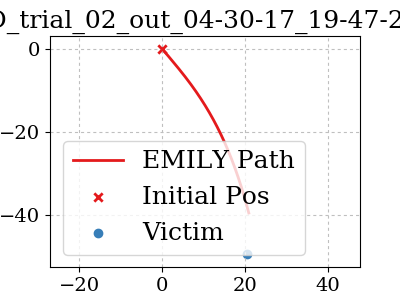

<IPython.core.display.Javascript object>


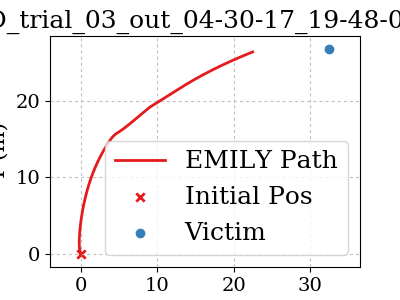

<IPython.core.display.Javascript object>


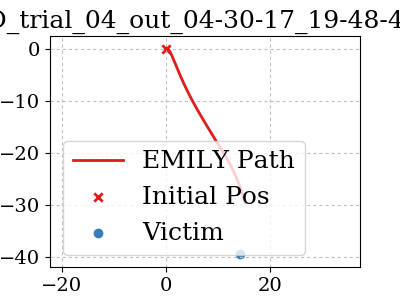

<IPython.core.display.Javascript object>


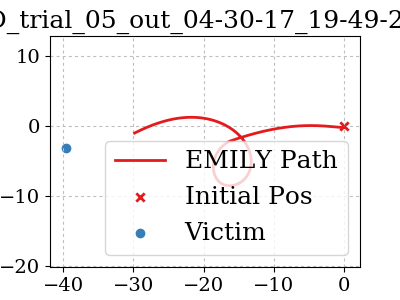

<IPython.core.display.Javascript object>


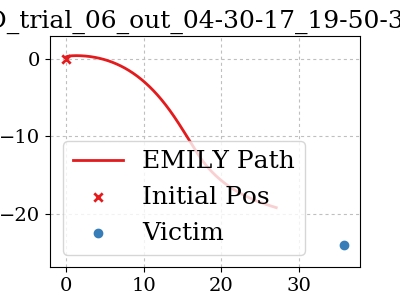

<IPython.core.display.Javascript object>


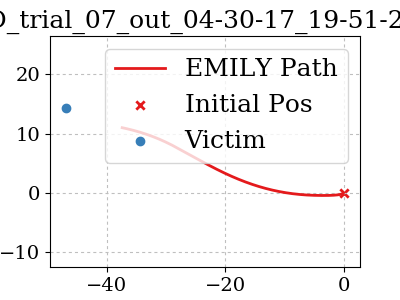

<IPython.core.display.Javascript object>


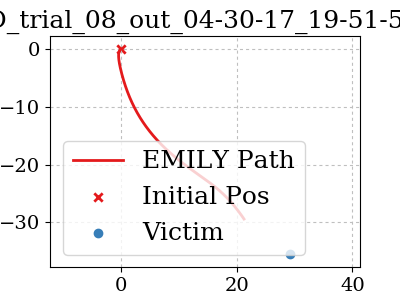

<IPython.core.display.Javascript object>


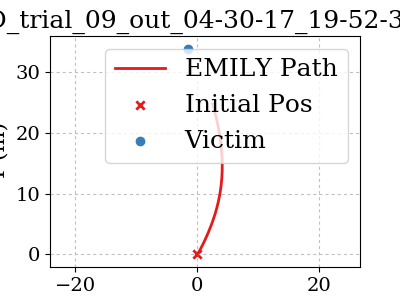

<IPython.core.display.Javascript object>


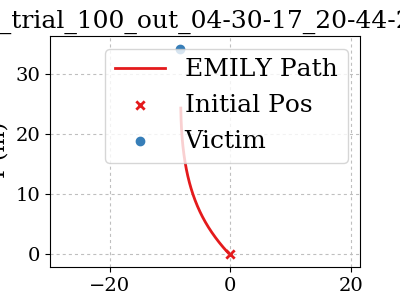

In [29]:
plot_all()

## Plot with Path

Same view_plot() but with the path shown.

In [16]:
def view_trial_with_path(trial, trial_meta, title='Test'):
    start = (trial['em_x'][0], trial['em_y'][0])
    end = (float(trial_meta['em2vic_x'][0]), float(trial_meta['em2vic_y'][0]))
    
    plt.plot(trial['em_x'], trial['em_y'], label='EMILY Path')
    plt.scatter(*start, marker='x', label='Initial Pos')
    plt.scatter(*end, marker='o', label='Victim')
    plt.axis('equal')
    plt.plot(*zip(start, end), linestyle='--')
    
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.legend(loc='best')
    plt.title(title)

In [17]:
view_trial_with_path(trial, trial_meta, title='with path')

## Cross Track Error

Compute cross track error for each sample and then sum / time.

In [18]:
import scipy.optimize

In [19]:
start = (trial['em_x'][0], trial['em_y'][0])
end = (float(trial_meta['em2vic_x'][0]), float(trial_meta['em2vic_y'][0]))

diff = np.array(start) - np.array(end)
m = diff[1]/diff[0]

In [20]:
def straight_path(x, trial):
    start = (trial['em_x'][0], trial['em_y'][0])
    end = (float(trial_meta['em2vic_x'][0]), float(trial_meta['em2vic_y'][0]))

    diff = np.array(start) - np.array(end)
    m = diff[1]/diff[0]
    
    return np.array([x, x*m])

In [21]:
straight_path(5, trial)

array([  5., -15.])

In [22]:
def norm(s, path, x, y, trial):
    return np.linalg.norm(path(s, trial) - np.array([x, y]))

In [23]:
def cross_track_error(path, objective, x, y):
    res = scipy.optimize.minimize(objective, x0=5, args=(path, x, y, trial))
    return res.fun

In [24]:
cross_track_error(straight_path, norm, -3, -3)

5.366563146000589

## Cross Track Error through Trial

Use pandas to compute cross track error over all trials.

In [25]:
trial['xte'] = np.vectorize(cross_track_error, excluded=(0, 1))(straight_path, norm, trial['em_x'], trial['em_y'])

In [26]:
trial['t'].values[-1]

36.399999999999999

In [27]:
trial['xte']
xte_per_time = trial['xte'].sum() / trial['t'].values[-1]
print('The total cross track error divided by trial time is %.2f m/s.' % xte_per_time)

The total cross track error divided by trial time is 93.74 m/s.


### Wrap it up

Wrap cross trial to interface with load_data()

In [28]:
def trial_cross_track_error(trial):
    trial['xte'] = np.vectorize(cross_track_error, excluded=(0, 1))(straight_path, norm, trial['em_x'], trial['em_y'])
    return trial['xte'].sum() / trial['t'].values[-1]

In [29]:
%time
trial_cross_track_error(trial)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 11 µs


93.743007957012722

In [30]:
for stamp in stamps:
    trial, _ = load_data_from_stamp(stamp)
    print('File : %s, XTE: %.3f' % (stamp, trial_cross_track_error(trial)))

File : 04-26-17_22-00-13, XTE: 119.697
File : 04-26-17_22-06-17, XTE: 119.697
File : 04-26-17_22-09-49, XTE: 18.836
File : 04-26-17_22-11-26, XTE: 134.260
File : 04-26-17_22-17-01, XTE: 93.743
File : 04-26-17_22-18-13, XTE: 93.743
File : 04-26-17_22-18-45, XTE: 93.408
File : 04-26-17_22-19-28, XTE: 92.979
File : 04-26-17_22-20-03, XTE: 92.979
File : 04-26-17_22-20-48, XTE: 93.393
File : 04-26-17_22-21-24, XTE: 93.362
File : 04-26-17_22-23-02, XTE: 93.112


## Animate Trials

Give function `animate_trials()` a list of stamps and it will load and animate trials

Use  `matplotlib.animation.FuncAnimation`  for the animation and 'imagemagick' to write a GIF.

In [31]:
cd ../../jupyter/

/Users/mitchallain/Google Drive/CSCE 635 Project/Code/jupyter


In [32]:
from matplotlib.animation import FuncAnimation

<IPython.core.display.Javascript object>


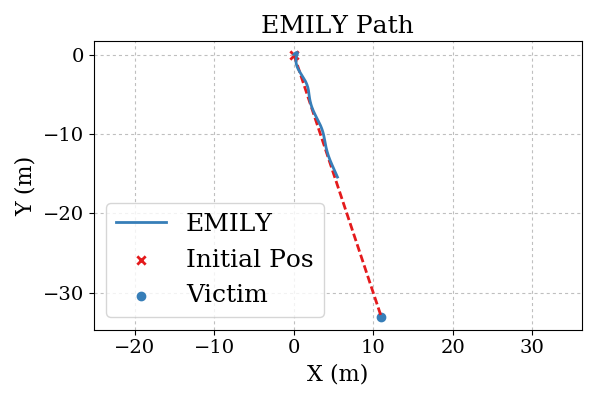

In [52]:
fig = plt.figure(figsize=(6, 4))

# line, = plt.plot([], [], label='EMILY Path', animated=True)

plt.xlabel('X (m)')
plt.ylabel('Y (m)')

start = (trial['em_x'][0], trial['em_y'][0])
end = (float(trial_meta['em2vic_x'][0]), float(trial_meta['em2vic_y'][0]))
plt.scatter(*start, marker='x', label='Initial Pos')
plt.scatter(*end, marker='o', label='Victim')
plt.plot(*zip(start, end), linestyle='--', color='b')

path, = plt.plot([], [], label='EMILY', color='r')

plt.legend(loc='lower left')
plt.title('EMILY Path')

plt.tight_layout()

def update(i):
    plt.axis('equal')
    path.set_data(trial['em_x'][:i].values, trial['em_y'][:i].values)


anim = FuncAnimation(fig, update,
                     frames=np.arange(0, 25)*10,
                     interval=200)

anim.save('fig/path.gif', dpi=150, writer='imagemagick')

In [55]:
def load_data_from_fname(fname):
    trial = pd.read_csv(fname)
    trial_meta = pd.read_csv(fname)
    return trial, trial_meta

In [65]:
def animate_many(trials):
    fig = plt.figure(figsize=(6, 4))

    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')

    start = (trial['em_x'][0], trial['em_y'][0])
    end = (float(trial_meta['em2vic_x'][0]), float(trial_meta['em2vic_y'][0]))
    plt.scatter(*start, marker='x', label='Initial Pos')
    plt.scatter(*end, marker='o', label='Victim')
    plt.plot(*zip(start, end), linestyle='--', color='b')

    paths = []
    for i in range(len(trials)):
        path, = plt.plot([], [])
        paths.append(path)

    plt.legend(loc='lower left')
    plt.title('EMILY Paths')

    plt.tight_layout()

    def update(i):
        for j, tr in enumerate(trials):
            paths[j].set_data(tr['em_x'][:i].values, tr['em_y'][:i].values)
        plt.axis('equal')

    anim = FuncAnimation(fig, update,
                         frames=np.arange(0, len(trial)/10)*10,
                         interval=200)

    anim.save('fig/many_paths.gif', dpi=150, writer='imagemagick')

In [70]:
pwd

u'/Users/mitchallain/Google Drive/CSCE 635 Project/Code/Test/data'

In [67]:
trials = []
for stamp in stamps:
    temp, _ = load_data_from_stamp(stamp)
    trials.append(temp)

len(trials)

12

In [72]:
pwd

u'/Users/mitchallain/Google Drive/CSCE 635 Project/Code/Test'

In [73]:
cd ../jupyter/

/Users/mitchallain/Google Drive/CSCE 635 Project/Code/jupyter


<IPython.core.display.Javascript object>


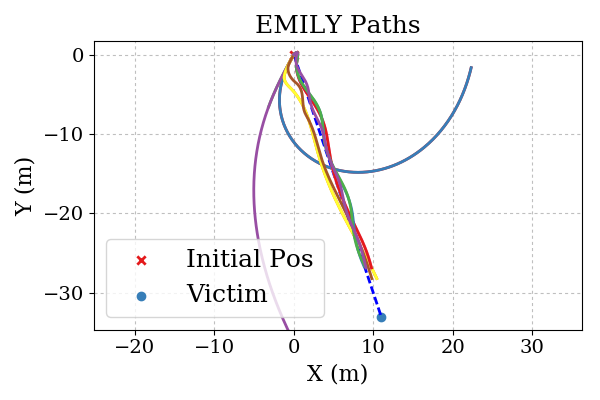

In [74]:
animate_many(trials)

____

In [31]:
cd ..

/Users/mitchallain/Google Drive/CSCE 635 Project/Code/jupyter


In [63]:
ls

002852_0414.csv          data/                    fig/
Icon?                    data 4-30/               keras-matlab-test.ipynb
analysis-dev.ipynb       data 4-30_2/             keras-tutorial.ipynb
analysis.ipynb           data 4-30_3/             net-analysis.ipynb
annalysis.py             data 4-30_4/             trials/
annalysis.pyc            data 5-1/
cross_track_errors.csv   data 5-30_2/


In [65]:
files = [f for f in os.listdir('data 5-30_2/') if 'out' in f]

trials3 = []
trials_meta3 = []

for f in files:
    tr, trm = ann.load_data_from_fname('data 5-30_2/' + f)
    trials3.append(tr)
    trials_meta3.append(trm)

In [70]:
trials_meta3[0].head()

,train_bool,path_type,LOS_radius,em2vic_x,em2vic_y,theta_i,current_x,current_y,throttle,Unnamed: 9
0,1,4,10,-26.7745,23.9832,3.6332,0.14392,0.038824,3,NaN


In [67]:
ann.straight_mean_cte(trials3[1], trials_meta3[1])

1.2666116229827735

In [72]:
ctes = np.zeros(len(files))

for i, (tr, trm) in enumerate(zip(trials3, trials_meta3)):
    ctes[i] = ann.straight_mean_cte(tr, trm)

In [73]:
ctes.mean()

1.6664492645051741

In [61]:
np.concatenate((ctes[:5], ctes[6:])).mean()

1.020205685776113

In [47]:
reload(ann)

<module 'annalysis' from 'annalysis.py'>